In [41]:
import yfinance as yf
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt

1. Собрать данные по дневным ценам активов (акций) и дневным объемам продаж на заданном фондовом рынке за указанный период. Добавить (если нет) данные по индексу рынка

2. Преобразовать данные по ценам в данные по доходностям (используйте логарифмическую доходность). Вычислите оценки ожидаемых доходностей и стандартных отклонений и постройте «карту» активов в системе координат (σ, E).

3. Рассмотрите портфель с равными долями капитала и отметьте его на карте активов в системе координат (σ, E). Дайте характеристику этому портфелю.

4. Рассмотрите индекс рынка и отметьте его на карте активов в системе координат (σ,E). Дайте характеристику индексу рынка.
PS σ - Risk, E - Expectation

$R_{log} (t + \Delta t) = \frac{P(t)}{P(t - \Delta t)}$

$\sigma(R) = \sqrt{\frac{\sum^n_{i=1} (r_i - \overline{r})^2}{n - 1}}$   

[NOTE ON SIMPLE AND LOGARITHMIC RETURN](https://core.ac.uk/download/pdf/161062652.pdf)

In [23]:
def get_descriptive_statistics(frame):
    E = np.mean(frame["Log_R"])
    sigma = np.std(frame["Log_R"])
    frame['E'] = E
    frame['sigma'] = sigma
    return frame, E, sigma

def get_log_R(frame):
    frame['Log_R'] = np.log(frame['Close'] / frame['Close'].shift(1))
    return frame

In [86]:
actives_info = {'auto' : {'Lifan' : '601777.SS', 'Cherry' : 'CHMI', 'SAIC Motor Corporation Limited' : '600104.SS'},
            'IT'  : {'Tencent Holdings' : '0700.HK', '360 Security Technology' : '601360.SS', 'Xiaomi' : '1810.HK'},
            'metallurgy' : {'Baotou Steel' : '600010.SS' , 'Hesteel Group' : '000709.SZ', 'Angang Steel' : '0347.HK'},
            'banks' :  {'Industrial and Commercial Bank of China' : '1398.HK', 'China Construction Bank' : '0939.HK'},
            'index' : {'index' : '000001.SS'}}
codes, actives = [], {}
E, sigma, mean_vol = {}, {}, {}
index_E, index_sigma, index_mean_vol = 0, 0, 0
index_active = None

for k, v in actives_info.items():
    for kk, code in v.items():
        codes.append(code)

        active = yf.download(code, start="2018-01-01", end="2018-12-31")
        # active.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)
        active = get_log_R(active)
        active, E_, s_ = get_descriptive_statistics(active)
        if kk == 'index':
            index_E = E_
            index_sigma = s_
            index_mean_vol = active['Volume'].mean()
            index_active = active
        else:
            E[kk], sigma[kk], actives[kk], mean_vol[kk] = E_, s_, active, active['Volume'].mean()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


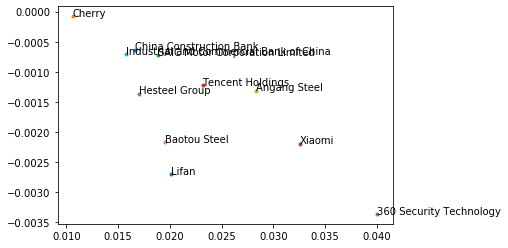

In [87]:
def get_R_distribution_plot(frame, label):
    x, y = frame['sigma'].iloc[0], frame['E'].iloc[0]
    plt.plot(x, y, '.')
    plt.annotate(label, (x, y))

def R_distribution_actives(actives):
    for key, frame in actives.items():
        get_R_distribution_plot(frame, key)
    plt.show()
    
R_distribution_actives(actives)

In [95]:
import plotly.graph_objects as go
import plotly.express as px

df = pd.DataFrame()
df['sigma'] = list(sigma.values())
df['E'] = list(E.values())
df['names'] = list(E.keys())
df['mean_val'] = list(mean_vol.values())

fig = px.scatter(df, x="sigma", y="E", text="names", title="E, Risk", size="mean_val")
fig.add_trace(go.Scatter(
    x=[index_sigma],
    y=[index_E],
    mode="markers+text",
    #name="index",
    text='index',
    textposition="top center"
))
fig.add_trace(go.Scatter(
    x=[df['E'].mean()],
    y=np.cov(df['E']),
    mode="markers+text",
    #name="balanced portfolio",
    text='balanced portfolio',
    textposition="top center"
))
fig.show()